<a href="https://colab.research.google.com/github/nberry5/DCS-210/blob/main/Berry_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")

In [ ]:
library(tidyverse)

In [ ]:
install.packages("tidymodels")

In [ ]:
library(tidymodels)

In [ ]:
install.packages("ggformula")

In [ ]:
library(ggformula)

In [49]:
twitch <- read.csv("/content/twitchdata-update.csv")

In [122]:
glimpse(twitch)

Rows: 1,000
Columns: 13
$ Channel              <chr> "xQcOW", "summit1g", "Gaules", "ESL_CSGO", "Tfue"…
$ Watch.time.Minutes.  <dbl> 6196161750, 6091677300, 5644590915, 3970318140, 3…
$ Stream.time.minutes. <int> 215250, 211845, 515280, 517740, 123660, 82260, 13…
$ Peak.viewers         <int> 222720, 310998, 387315, 300575, 285644, 263720, 1…
$ Average.viewers      <int> 27716, 25610, 10976, 7714, 29602, 42414, 24181, 1…
$ Followers            <int> 3246298, 5310163, 1767635, 3944850, 8938903, 1563…
$ Followers.gained     <int> 1734810, 1370184, 1023779, 703986, 2068424, 55420…
$ Views.gained         <int> 93036735, 89705964, 102611607, 106546942, 7899858…
$ Partnered            <chr> "True", "True", "True", "True", "True", "True", "…
$ Mature               <chr> "False", "False", "True", "False", "False", "Fals…
$ Language             <chr> "English", "English", "Portuguese", "English", "E…
$ Is.English           <chr> "English", "English", "Other", "English", "Englis…
$ Partnered.Dumm

In [67]:
twitch <- twitch %>% mutate(Partnered.Dummy = if_else(Partnered == "True", 1, 0))
twitch <- twitch %>% mutate(Is.English = if_else(Language == "English", "English", "Other"))

In [ ]:
sorted_twitch <- arrange(twitch, desc(Views.gained))

no_massive_views <- sorted_twitch[-c(1),]
no_massive_views

In [62]:
  no_massive_views <- no_massive_views %>% mutate(Is.English = if_else(Language == "English", "English", "Other"))

In [63]:
  no_massive_views <- no_massive_views %>% mutate(Partnered.Dummy = if_else(Partnered == "True", 1, 0))

In [64]:
cor(twitch[, c('Watch.time.Minutes.','Stream.time.minutes.','Followers', 'Views.gained')])
cor(no_massive_views[, c('Watch.time.Minutes.','Stream.time.minutes.','Followers', 'Views.gained')])

,Watch.time.Minutes.,Stream.time.minutes.,Followers,Views.gained
Watch.time.Minutes.,1.0000000,0.15058790,0.62023388,0.52986201
Stream.time.minutes.,0.1505879,1.00000000,-0.09129851,0.06437003
Followers,0.6202339,-0.09129851,1.00000000,0.27646651
Views.gained,0.5298620,0.06437003,0.27646651,1.00000000


,Watch.time.Minutes.,Stream.time.minutes.,Followers,Views.gained
Watch.time.Minutes.,1.0000000,0.15100710,0.62937454,0.7241791
Stream.time.minutes.,0.1510071,1.00000000,-0.09127902,0.1020899
Followers,0.6293745,-0.09127902,1.00000000,0.5087735
Views.gained,0.7241791,0.10208992,0.50877349,1.0000000


`geom_smooth()` using formula = 'y ~ x'


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),6.737228e+05,4.385758e+04,15.36160,5.797683e-48
Stream.time.minutes.,-8.602132e-01,2.970021e-01,-2.89632,3.858085e-03


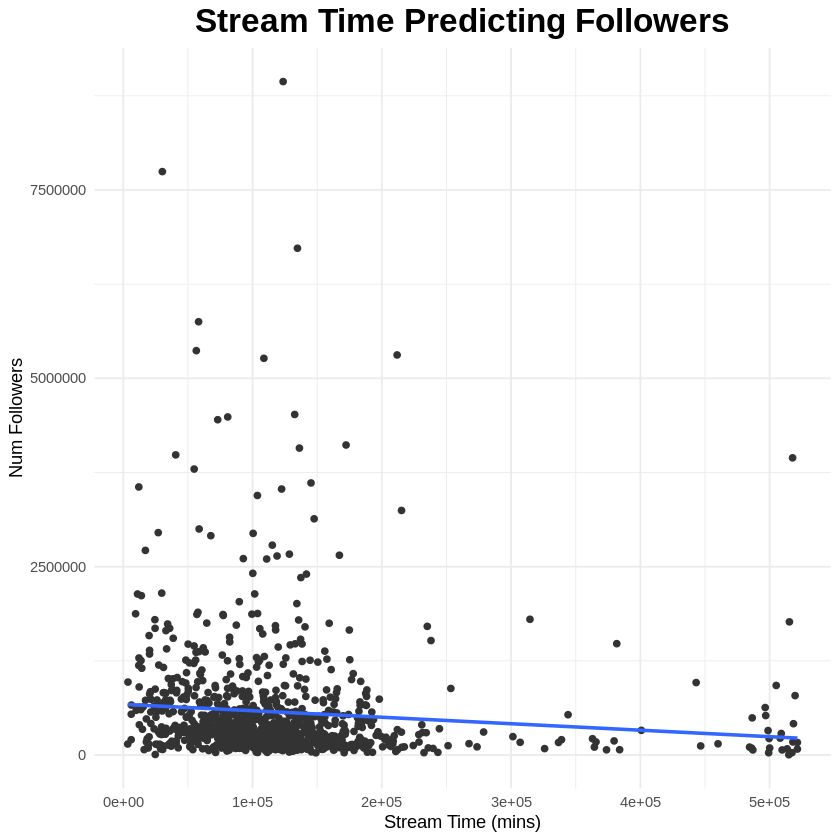

In [116]:
ggplot(twitch, aes(Stream.time.minutes., Followers)) +
  geom_point(color = "#333333") +
  geom_smooth(method='lm', se=FALSE) +
  theme_minimal() +
  labs(x = 'Stream Time (mins)', y = 'Num Followers', title = 'Stream Time Predicting Followers') +
  theme(plot.title = element_text(hjust=0.5, size=20, face='bold'))

st.f_main <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ Stream.time.minutes., data = twitch) %>%
  tidy()

st.f_main

`geom_smooth()` using formula = 'y ~ x'


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.658643e+05,2.70121e+04,17.246504,1.548519e-58
Views.gained,8.929408e-03,9.82537e-04,9.088114,5.297717e-19


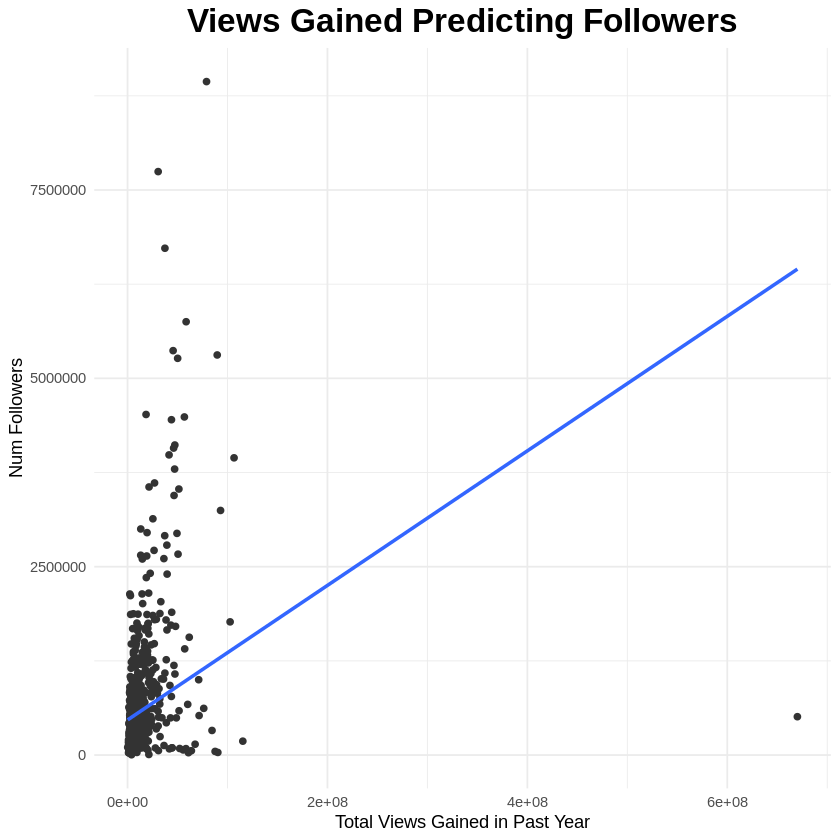

In [117]:
ggplot(twitch, aes(Views.gained, Followers)) +
  geom_point(color = "#333333") +
  geom_smooth(method='lm', se=FALSE) +
  theme_minimal() +
  labs(x = 'Total Views Gained in Past Year', y = 'Num Followers', title = 'Views Gained Predicting Followers') +
  theme(plot.title = element_text(hjust=0.5, size=20, face='bold')) 

vg.f_main1 <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ Views.gained, data = twitch) %>%
  tidy()

vg.f_main1

`geom_smooth()` using formula = 'y ~ x'


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.396113e+05,2.819086e+04,8.499609,6.865786e-17
Views.gained,3.002116e-02,1.608823e-03,18.660322,6.962818e-67


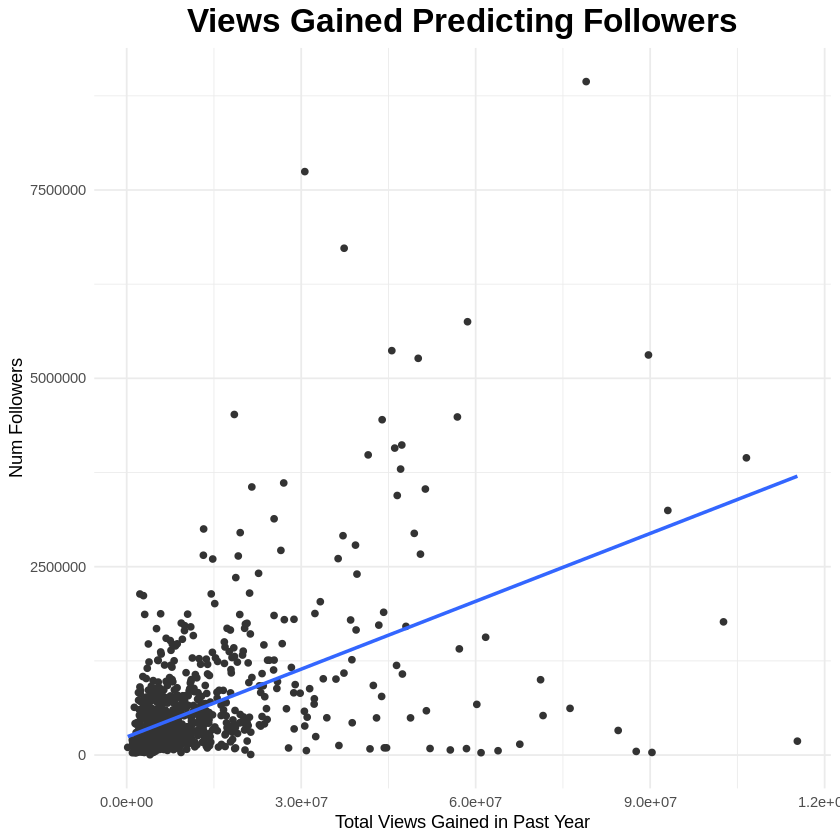

In [118]:
ggplot(no_massive_views, aes(Views.gained, Followers)) +
  geom_point(color = "#333333") +
  geom_smooth(method='lm', se=FALSE) +
  theme_minimal() +
  labs(x = 'Total Views Gained in Past Year', y = 'Num Followers', title = 'Views Gained Predicting Followers') +
  theme(plot.title = element_text(hjust=0.5, size=20, face='bold')) 

vg.f_main2 <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ Views.gained, data = no_massive_views) %>%
  tidy()

vg.f_main2

`geom_smooth()` using formula = 'y ~ x'


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.902316e+05,2.509518e+04,7.580404,7.856461e-14
Watch.time.Minutes.,9.077369e-04,3.634011e-05,24.978928,2.327483e-107


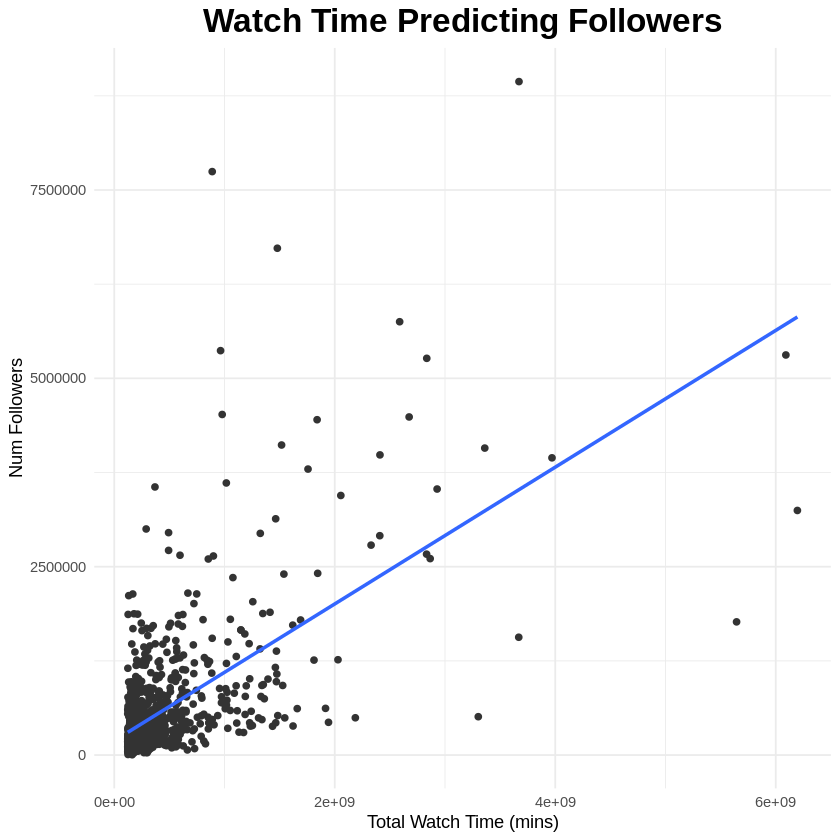

In [119]:
ggplot(twitch, aes(Watch.time.Minutes., Followers)) +
  geom_point(color = "#333333") +
  geom_smooth(method='lm', se=FALSE) +
  theme_minimal() +
  labs(x = 'Total Watch Time (mins)', y = 'Num Followers', title = 'Watch Time Predicting Followers') +
  theme(plot.title = element_text(hjust=0.5, size=20, face='bold'))  

wt.f_main <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ Watch.time.Minutes., data = twitch) %>%
  tidy()

wt.f_main

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),608951.9,28889.71,21.078509,7.142477e-82
factor(Mature)True,-169121.2,60239.20,-2.807494,5.090152e-03


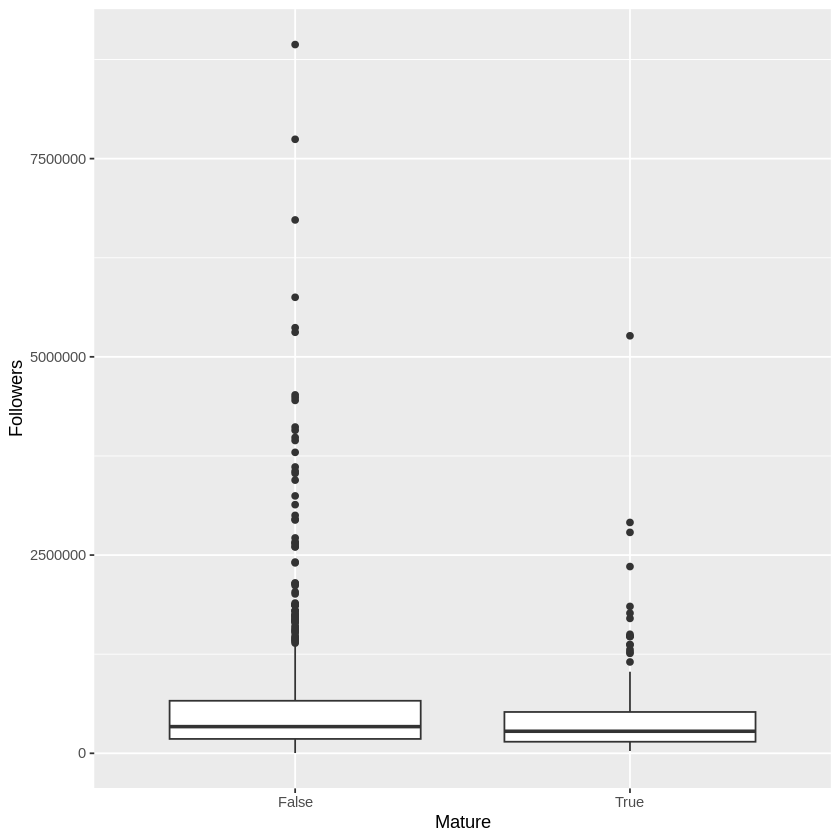

In [82]:
m.f_main <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ factor(Mature), data = twitch) %>%
  tidy()

m.f_main

ggplot(twitch, aes(x = Mature, y = Followers)) + 
  geom_boxplot()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),705685.6,36051.80,19.574213,1.843162e-72
Is.EnglishOther,-263362.3,50236.96,-5.242401,1.934363e-07


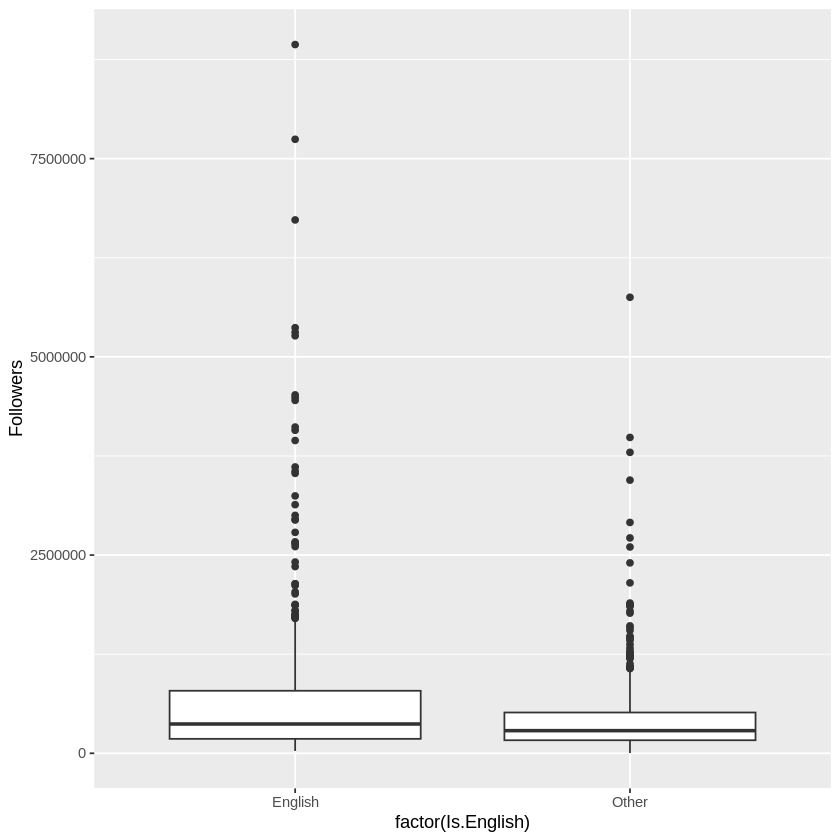

In [91]:
e.f_main <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ Is.English, data = twitch) %>%
  tidy()

ggplot(twitch, aes(x = factor(Is.English), y = Followers)) + 
  geom_boxplot()

e.f_main

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),331942.7,171418.1,1.936451,0.05309452
Partnered.Dummy,243467.7,173335.3,1.404605,0.16044996


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),9.733805e-01,5.686207e-03,171.182746,0.00000
Followers,8.103615e-09,5.769320e-09,1.404605,0.16045


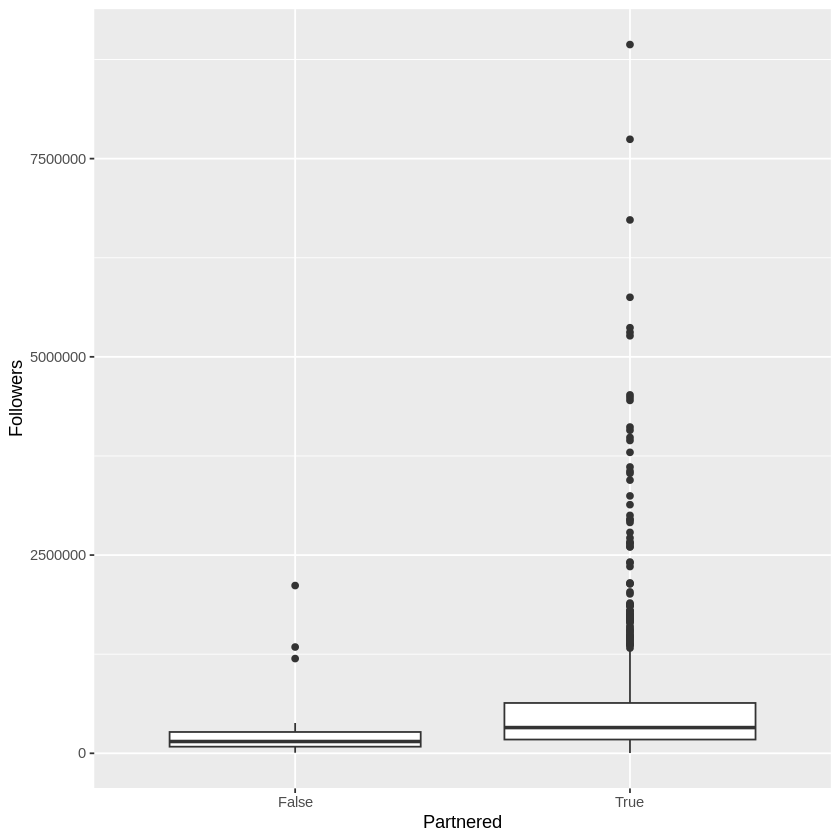

In [96]:
f.p_main <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ Partnered.Dummy, data = twitch) %>%
  tidy()

f.p_main

ggplot(twitch, aes(x = Partnered, y = Followers)) + 
  geom_boxplot()

`geom_smooth()` using formula = 'y ~ x'


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.384776e+05,1.886840e+05,1.79388621,0.07313457
Watch.time.Minutes.,-2.348200e-05,4.757774e-04,-0.04935501,0.96064628
PartneredTrue,-1.475605e+05,1.903785e+05,-0.77509001,0.43847045
Watch.time.Minutes.:PartneredTrue,9.355106e-04,4.771698e-04,1.96054020,0.05021110


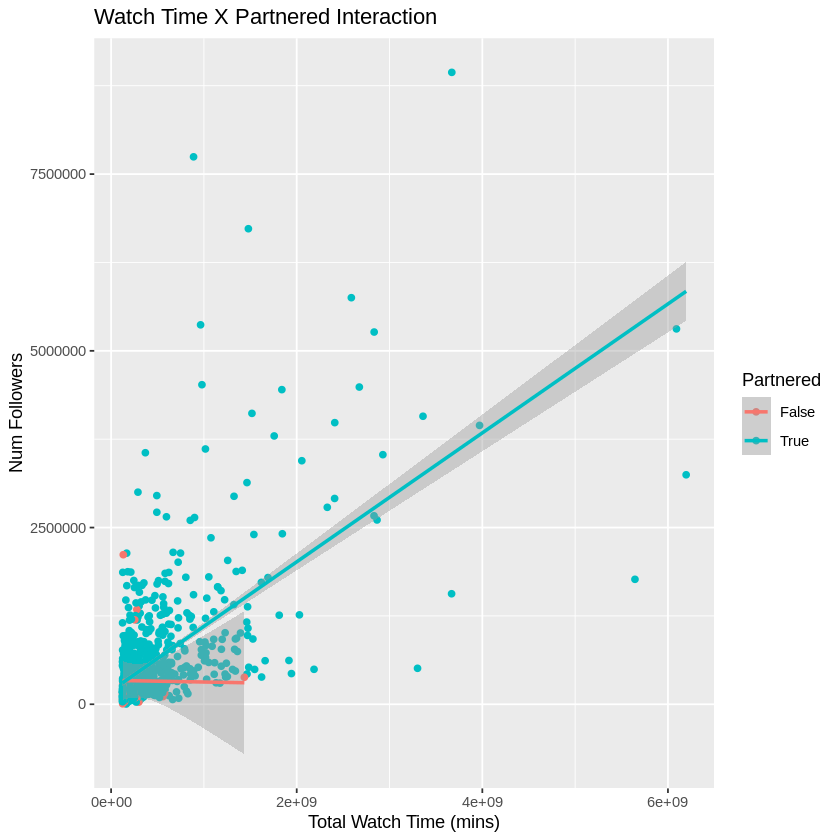

In [121]:
wt.f_int_p <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ Watch.time.Minutes. * Partnered, data = twitch) %>%
  tidy()

qplot(x = Watch.time.Minutes., y = Followers, data = twitch, color = Partnered) +
  geom_smooth(method = "lm") +
  labs(x = 'Total Watch Time (mins)', y = 'Num Followers', title = 'Watch Time X Partnered Interaction')

wt.f_int_p

`geom_smooth()` using formula = 'y ~ x'


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.909702e+05,2.848135e+04,6.7050985,3.366643e-11
Watch.time.Minutes.,9.689012e-04,4.031183e-05,24.0351579,4.865480e-101
MatureTrue,7.694737e+03,5.856687e+04,0.1313838,8.954983e-01
Watch.time.Minutes.:MatureTrue,-3.258056e-04,9.020020e-05,-3.6120274,3.189775e-04


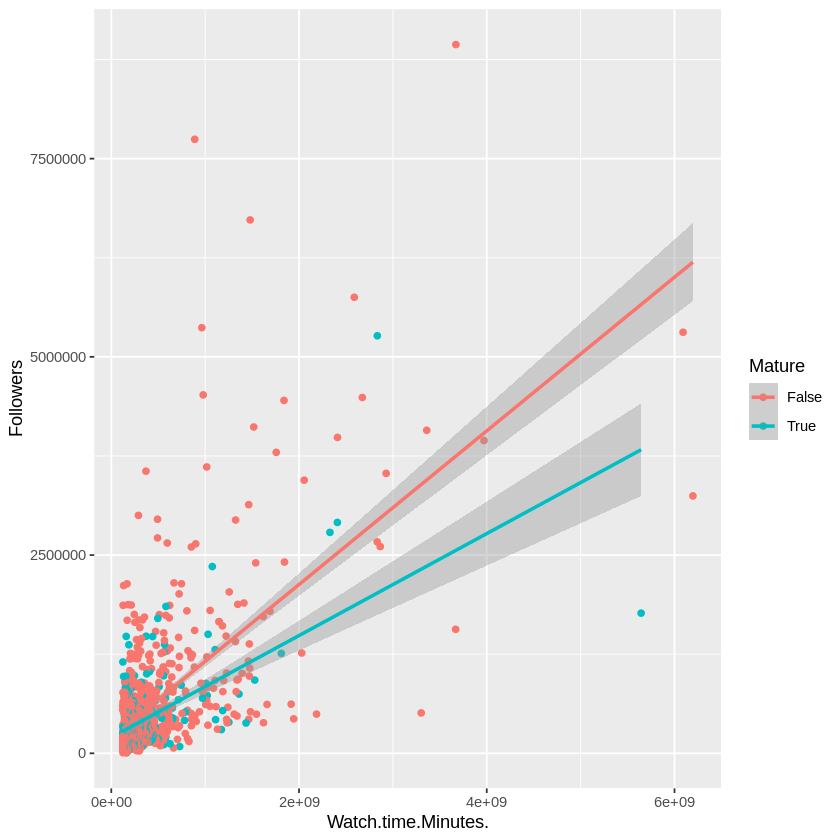

In [100]:
wt.f_int_m <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ Watch.time.Minutes. * Mature, data = twitch) %>%
  tidy()

qplot(x = Watch.time.Minutes., y = Followers, data = twitch, color = Mature) +
  geom_smooth(method = "lm") 

wt.f_int_m

`geom_smooth()` using formula = 'y ~ x'


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),2.516769e+05,3.499709e+04,7.191368,1.258628e-12
Watch.time.Minutes.,9.620468e-04,4.356667e-05,22.082175,2.867693e-88
Is.EnglishOther,-8.278739e+04,5.039705e+04,-1.642703,1.007600e-01
Watch.time.Minutes.:Is.EnglishOther,-2.191256e-04,7.765224e-05,-2.821884,4.869207e-03


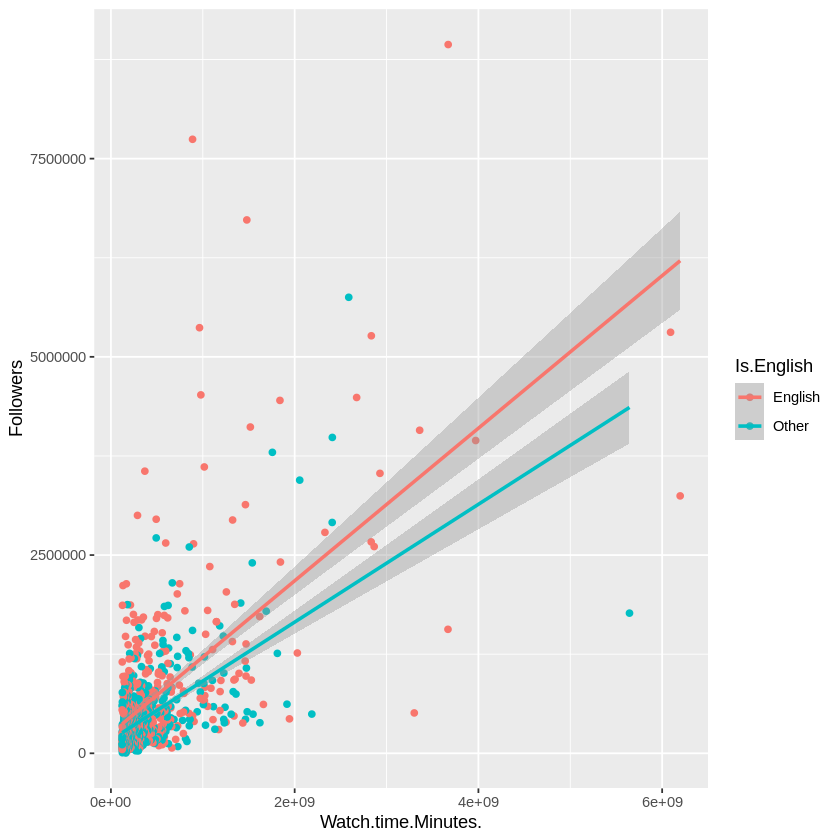

In [99]:
wt.f_int_e <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ Watch.time.Minutes. * Is.English, data = twitch) %>%
  tidy()

qplot(x = Watch.time.Minutes., y = Followers, data = twitch, color = Is.English) +
  geom_smooth(method = "lm") 

wt.f_int_e

In [85]:
all_vars <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Followers ~ Watch.time.Minutes. + Stream.time.minutes. + Partnered + Mature + Is.English + Views.gained, data = no_massive_views) %>%
  tidy()

all_vars
summary(all_vars)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.491680e+05,1.353359e+05,2.580010,1.002258e-02
Watch.time.Minutes.,8.301813e-04,5.163224e-05,16.078740,7.178415e-52
Stream.time.minutes.,-1.795152e+00,2.237359e-01,-8.023530,2.885472e-15
PartneredTrue,1.498693e+05,1.299259e+05,1.153498,2.489840e-01
MatureTrue,-1.075576e+05,4.568188e+04,-2.354492,1.874215e-02
Is.EnglishOther,-2.034828e+05,3.823518e+04,-5.321875,1.269906e-07
Views.gained,6.845198e-03,2.053841e-03,3.332876,8.912970e-04


     term              estimate         std.error           statistic     
 Length:7           Min.   :-203483   Min.   :     0.00   Min.   :-8.024  
 Class :character   1st Qu.: -53780   1st Qu.:     0.11   1st Qu.:-3.838  
 Mode  :character   Median :      0   Median : 38235.18   Median : 1.153  
                    Mean   :  26856   Mean   : 49882.73   Mean   : 1.064  
                    3rd Qu.:  74935   3rd Qu.: 87803.91   3rd Qu.: 2.956  
                    Max.   : 349168   Max.   :135335.89   Max.   :16.079  
    p.value         
 Min.   :0.000e+00  
 1st Qu.:6.000e-08  
 Median :8.913e-04  
 Mean   :3.981e-02  
 3rd Qu.:1.438e-02  
 Max.   :2.490e-01  

In [84]:
all_vars2 <- linear_reg() %>%
  set_engine("lm") %>%
  fit(Views.gained ~ Watch.time.Minutes. + Stream.time.minutes. + Partnered + Mature + Is.English + Followers, data = no_massive_views) %>%
  tidy()

all_vars2
summary(all_vars2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.187042e+07,2.053186e+06,5.7814651,9.914095e-09
Watch.time.Minutes.,1.675881e-02,7.149116e-04,23.4417868,4.722207e-97
Stream.time.minutes.,2.554601e+00,3.548422e+00,0.7199261,4.717401e-01
PartneredTrue,-9.285127e+06,1.976833e+06,-4.6969716,3.012113e-06
MatureTrue,-3.027089e+06,6.976390e+05,-4.3390483,1.577472e-05
Is.EnglishOther,1.400774e+06,5.944609e+05,2.3563764,1.864787e-02
Followers,1.617725e+00,4.853840e-01,3.3328765,8.912970e-04


     term              estimate          std.error         statistic     
 Length:7           Min.   :-9285127   Min.   :      0   Min.   :-4.697  
 Class :character   1st Qu.:-1513545   1st Qu.:      2   1st Qu.:-1.810  
 Mode  :character   Median :       2   Median : 594461   Median : 2.356  
                    Mean   :  136998   Mean   : 760303   Mean   : 3.799  
                    3rd Qu.:  700388   3rd Qu.:1337236   3rd Qu.: 4.557  
                    Max.   :11870424   Max.   :2053186   Max.   :23.442  
    p.value         
 Min.   :0.0000000  
 1st Qu.:0.0000015  
 Median :0.0000158  
 Mean   :0.0701854  
 3rd Qu.:0.0097696  
 Max.   :0.4717401  